Especialização em Inteligência Artificial<br>
Lista de Exercícios 4 - Análise e Previsão de Séries Temporais<br>
Prof. Carlos Severiano<br>
Aluno: Fernando dos Santos Alves Fernandes

### Exercício 1
Aplique o teste Augmented Dickey Fuller (ADF) às bases de dados em anexo a esta atividade e indique se as mesmas são estacionárias ou não. Comente também se, ao analisar as séries graficamente, os resultados fazem sentido.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

rcParams['figure.figsize'] = 15, 7

In [18]:
def teste_estacionariedade(X, cutoff=0.01):
    # O valor de cutoff, aqui definido como 0.01, serve como ponto de corte que, abaixo dele, sugere estacionariedade
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('valor-p = ' + str(pvalue) + '. A série ' + X.name +' parece ser estacionária.')
        return True
    else:
        print('valor-p = ' + str(pvalue) + '. A série ' + X.name +' parece ser não-estacionária')
        return False

#### Base 1

In [124]:
electric_production = pd.read_csv('datasets/Electric_Production.csv', index_col='DATE')
electric_production.head()

,IPG2211A2N
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


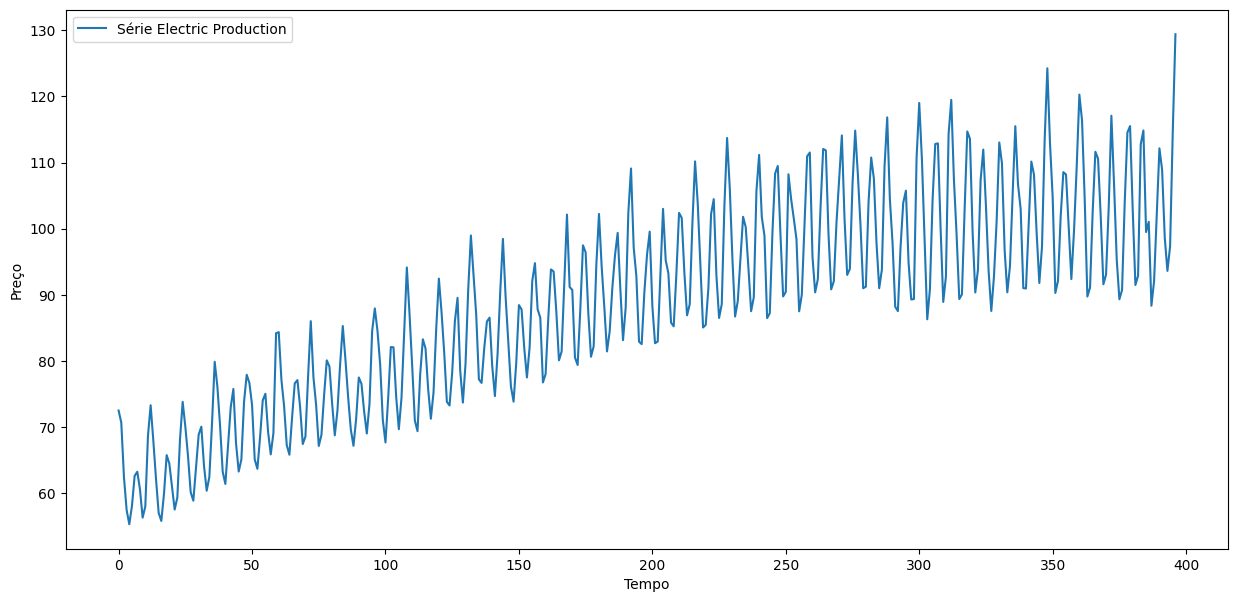

In [20]:
elec_prod = pd.Series(electric_production['IPG2211A2N'].values)
elec_prod.name = 'Electric Production'
plt.figure(figsize=(15,7))
plt.plot(elec_prod)
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend(['Série Electric Production'])
plt.show()

In [21]:
teste_estacionariedade(elec_prod)

valor-p = 0.18621469116586709. A série Electric Production parece ser não-estacionária


False

#### *Nota: Graficamente, a série 'Electric Production' parece apresentar uma tendência de crescimento. Portanto, faz sentido o teste ADF indentificá-la como uma série aparentemente não-estacionária.*

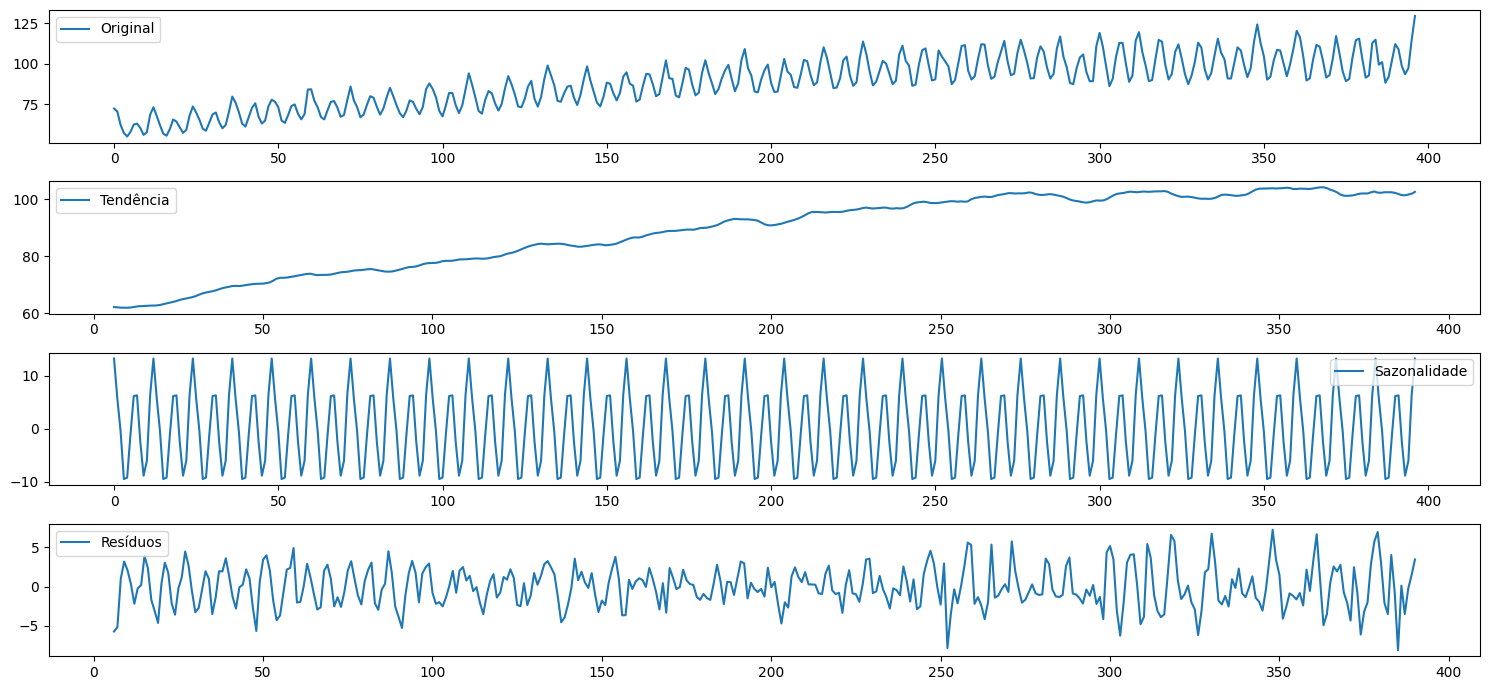

In [22]:
# Análise preliminar dos componentes da série: tendência, sazonalidade e resíduos.

decomposicao = seasonal_decompose(elec_prod, period=12)

tendencia = decomposicao.trend
sazonalidade = decomposicao.seasonal
residuo = decomposicao.resid

plt.subplot(411)
plt.plot(elec_prod, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(sazonalidade,label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residuo, label='Resíduos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### *Nota: Observando os componentes da série, confirma-se a presença da tendência.*

#### Base 2

In [23]:
shampoo_sales = pd.read_csv('datasets/shampoo_sales.csv', index_col='Month')
shampoo_sales.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


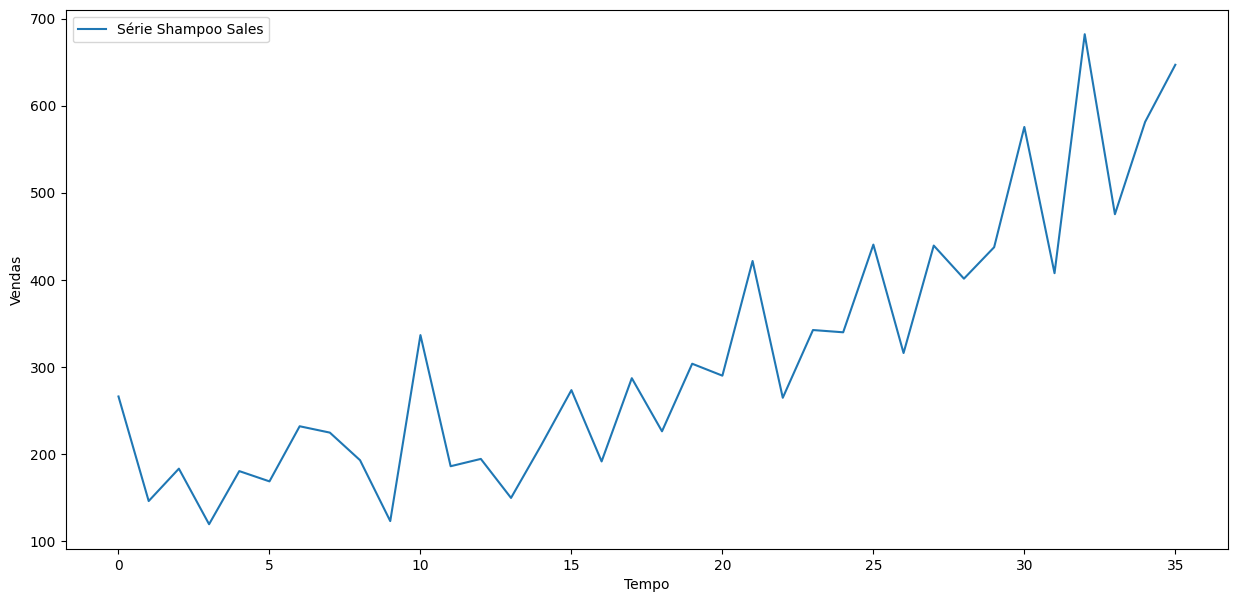

In [24]:
shamp_sales = pd.Series(shampoo_sales['Sales'].values)
shamp_sales.name = 'Shampoo Sales'
plt.figure(figsize=(15,7))
plt.plot(shamp_sales)
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend(['Série Shampoo Sales'])
plt.show()

In [25]:
teste_estacionariedade(shamp_sales)

valor-p = 1.0. A série Shampoo Sales parece ser não-estacionária


False

#### *Nota: Graficamente, a série 'Shampoo Sales' parece apresentar uma tendência de crescimento. Portanto, faz sentido o teste ADF indentificá-la como uma série aparentemente não-estacionária.*

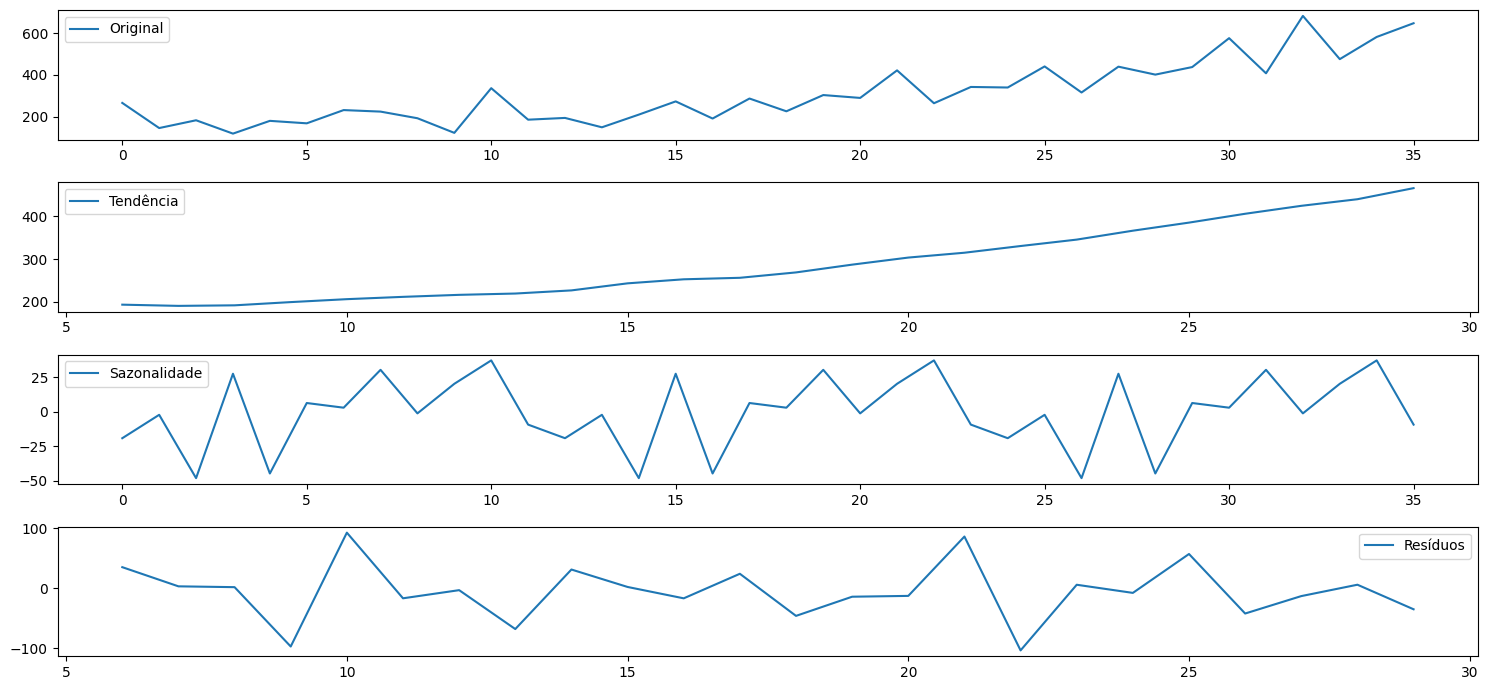

In [26]:
# Análise preliminar dos componentes da série: tendência, sazonalidade e resíduos.

decomposicao = seasonal_decompose(shamp_sales, period=12)

tendencia = decomposicao.trend
sazonalidade = decomposicao.seasonal
residuo = decomposicao.resid

plt.subplot(411)
plt.plot(shamp_sales, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(sazonalidade,label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residuo, label='Resíduos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### *Nota: Observando os componentes da série, confirma-se a presença da tendência.*

#### Base 3

In [27]:
airline_passengers = pd.read_csv('datasets/airline-passengers.csv', parse_dates=True, index_col='Month')
airline_passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


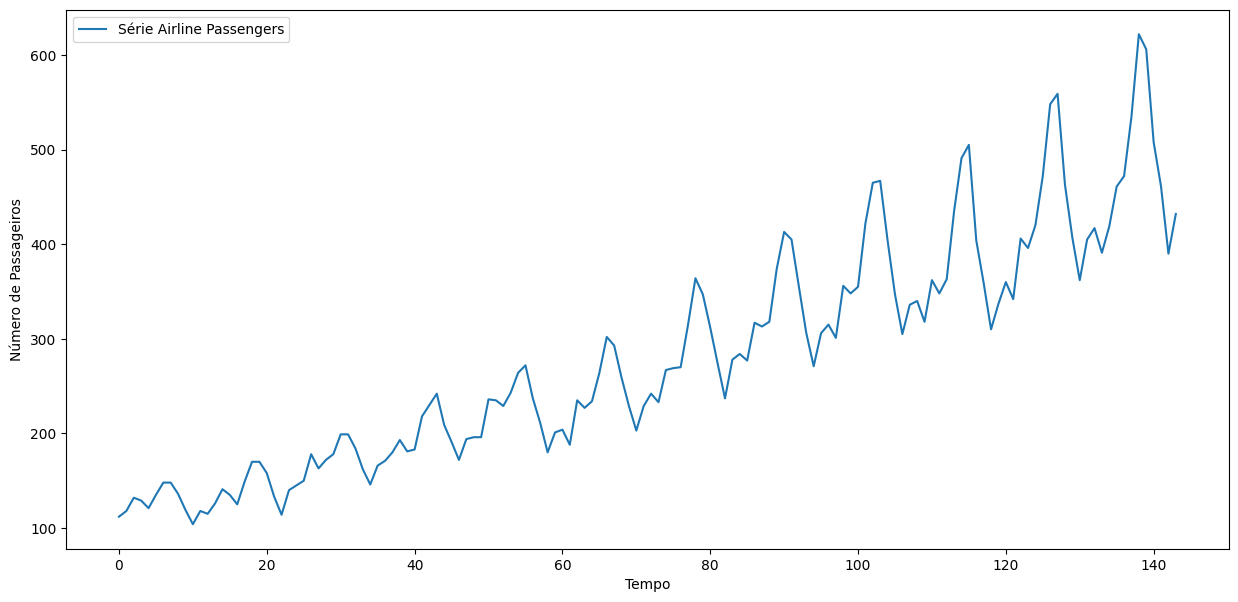

In [28]:
air_pass = pd.Series(airline_passengers['Passengers'].values)
air_pass.name = 'Airline Passengers'
plt.figure(figsize=(15,7))
plt.plot(air_pass)
plt.xlabel('Tempo')
plt.ylabel('Número de Passageiros')
plt.legend(['Série Airline Passengers'])
plt.show()

In [29]:
teste_estacionariedade(air_pass)

valor-p = 0.9918802434376413. A série Airline Passengers parece ser não-estacionária


False

#### *Nota: Graficamente, a série 'Airline Passengers' parece apresentar uma tendência de crescimento. Portanto, faz sentido o teste ADF indentificá-la como uma série aparentemente não-estacionária.*

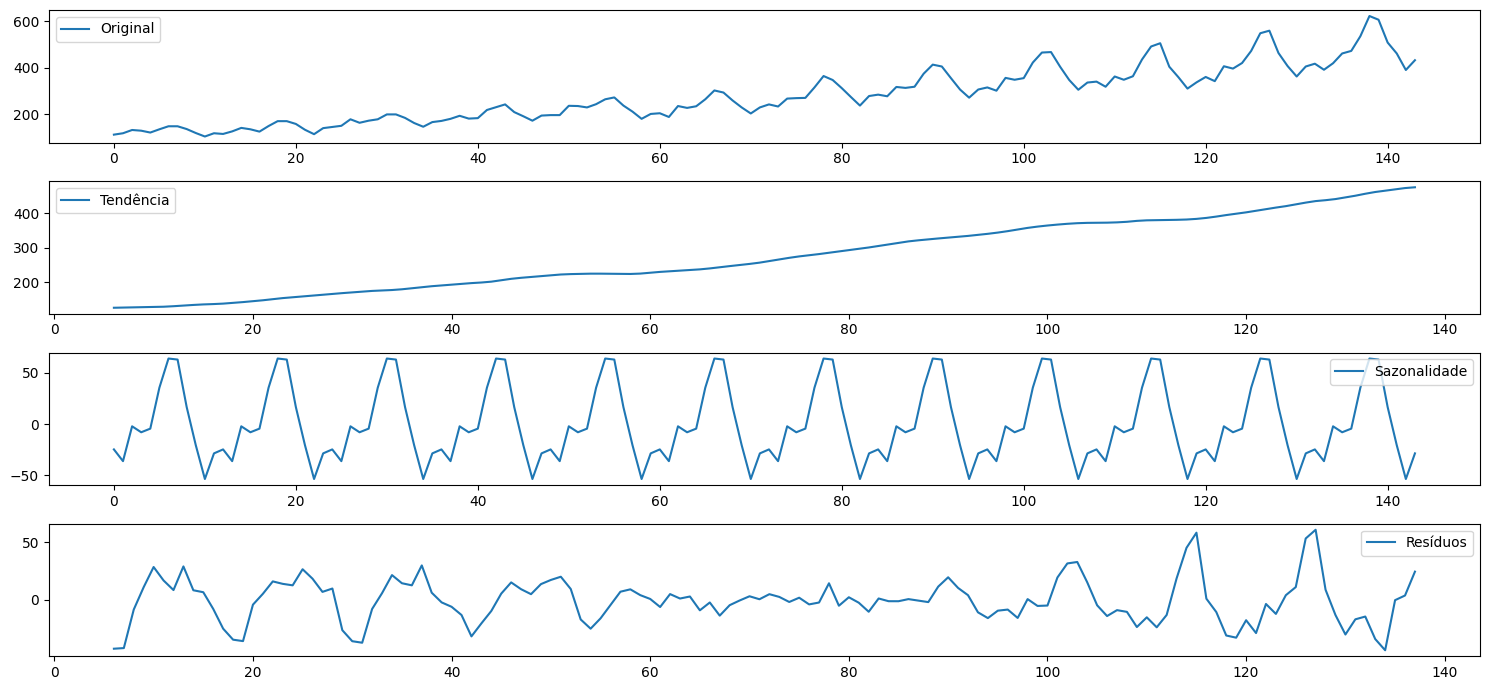

In [30]:
# Análise preliminar dos componentes da série: tendência, sazonalidade e resíduos.

decomposicao = seasonal_decompose(air_pass, period=12)

tendencia = decomposicao.trend
sazonalidade = decomposicao.seasonal
residuo = decomposicao.resid

plt.subplot(411)
plt.plot(air_pass, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(sazonalidade,label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residuo, label='Resíduos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### *Nota: Observando os componentes da série, confirma-se a presença da tendência.*

#### Base 4

In [31]:
facebook_price = pd.read_csv('datasets/facebook-historical-stock-price.csv', parse_dates=True, index_col='Date')
facebook_price.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


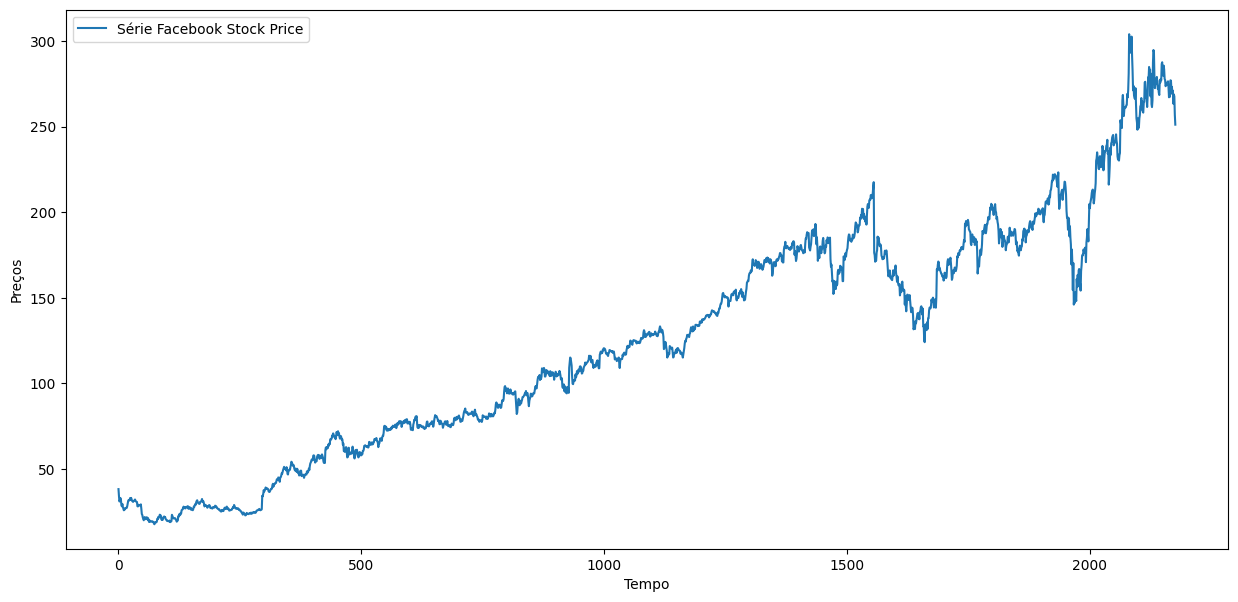

In [32]:
face_price = pd.Series(facebook_price['Close'].values)
face_price.name = "Ações Facebook"
plt.figure(figsize=(15,7))
plt.plot(face_price)
plt.xlabel('Tempo')
plt.ylabel('Preços')
plt.legend(['Série Facebook Stock Price'])
plt.show()

In [33]:
teste_estacionariedade(face_price)

valor-p = 0.9017361242145874. A série Ações Facebook parece ser não-estacionária


False

#### *Nota: Graficamente, a série 'Facebook Historical Stock Price' parece apresentar uma tendência de crescimento. Portanto, faz sentido o teste ADF indentificá-la como uma série aparentemente não-estacionária.*

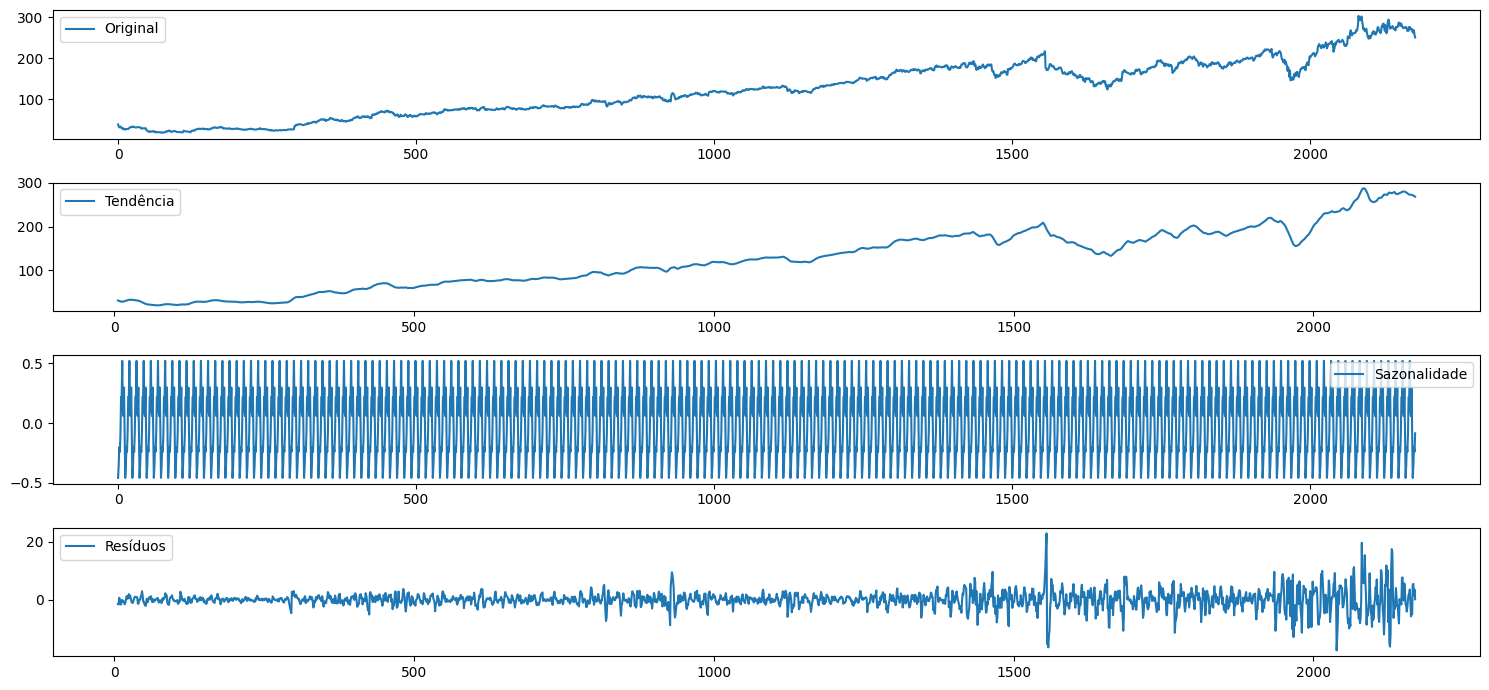

In [34]:
# Análise preliminar dos componentes da série: tendência, sazonalidade e resíduos.

decomposicao = seasonal_decompose(face_price, period=12)

tendencia = decomposicao.trend
sazonalidade = decomposicao.seasonal
residuo = decomposicao.resid

plt.subplot(411)
plt.plot(face_price, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(sazonalidade,label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residuo, label='Resíduos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### *Nota: Observando os componentes da série, confirma-se a presença da tendência.*

### Exercício 2
No notebook **Aula_05b.ipynb** vimos a aplicação de modelos ARCH/GARCH a uma série extraída do mercado financeiro. No entanto, o modelo GARCH(1,1) utilizado para previsão não pareceu estar bem ajustado, de acordo com o teste de Jarque-Bera. Observe o conteúdo apresentado na Aula 05 e também as referências indicadas para encontrar uma nova configuração do modelo GARCH(p,q) que seja melhor ajustada, de acordo com o teste de Jarque-Bera. Justifique os parâmetros escolhidos no modelo.

In [102]:
import numpy as np
import pandas as pd
import yfinance as yf

Base de dados: mesma base de dados do notebook *Aula_05b.ipynb*.

In [2]:
spy = yf.Ticker("SPY")
hist = spy.history(start = "2010-01-04", end = "2020-02-01")
df = pd.DataFrame(hist, columns=['Close'])
df.head()

,Close
Date,
2010-01-04 00:00:00-05:00,87.483177
2010-01-05 00:00:00-05:00,87.714775
2010-01-06 00:00:00-05:00,87.776527
2010-01-07 00:00:00-05:00,88.147057
2010-01-08 00:00:00-05:00,88.440399


In [3]:
df['Retorno'] = np.pad(np.diff(np.log(df['Close'])) * 100, (1, 0), 'constant', constant_values=np.nan)
retorno_abs = df['Retorno'].abs()

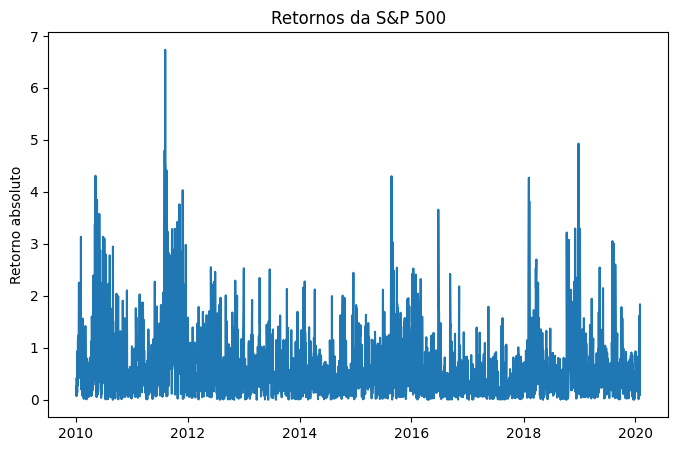

In [4]:
plt.figure(figsize=(8,5))
plt.plot(retorno_abs)
plt.ylabel("Retorno absoluto")
plt.title('Retornos da S&P 500');

Avaliação do efeito ARCH na série

In [5]:
from scipy.stats import chi2

def mcleod_li_test(x, k, cutoff=0.01):
    n = len(x)
    x_sq = x ** 2
    x_sum = np.sum(x_sq)
    x_lag_sum = np.sum(x_sq[:-k])
    test_stat = n * (n + 2) * x_lag_sum / (x_sum ** 2)
    df = k
    p_value = 1 - chi2.cdf(test_stat, df)

    if p_value < cutoff:
      print('Parece haver efeito ARCH nos dados')
    else:
      print('Não parece haver efeito ARCH nos dados')

    return test_stat, p_value

In [6]:
test_stat, p_value = mcleod_li_test(retorno_abs, 50)
print("Teste McLeod-Li: ", test_stat)
print("p-value: ", p_value)

Parece haver efeito ARCH nos dados
Teste McLeod-Li:  2932.060608316901
p-value:  0.0


Modelo GARCH a ser ajustado

In [7]:
!pip install arch

In [8]:
from sklearn.model_selection import train_test_split
from arch import arch_model

y_train, y_test = train_test_split(retorno_abs[1:], train_size= 0.8, shuffle=False)

garch_mod = arch_model(y_train, mean = "Zero",  vol='Garch', p=1, q=1, rescale=False)
res_garch = garch_mod.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4134.428237063656
Iteration:      2,   Func. Count:     14,   Neg. LLF: 3069.3134121087287
Iteration:      3,   Func. Count:     20,   Neg. LLF: 3281.664887441616
Iteration:      4,   Func. Count:     25,   Neg. LLF: 2411.999204333254
Iteration:      5,   Func. Count:     30,   Neg. LLF: 2403.7282118511384
Iteration:      6,   Func. Count:     34,   Neg. LLF: 2403.697264379989
Iteration:      7,   Func. Count:     38,   Neg. LLF: 2403.694298249565
Iteration:      8,   Func. Count:     42,   Neg. LLF: 2403.6941630223178
Iteration:      9,   Func. Count:     46,   Neg. LLF: 2403.6940998127116
Iteration:     10,   Func. Count:     49,   Neg. LLF: 2403.694099812804
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2403.6940998127116
            Iterations: 10
            Function evaluations: 49
            Gradient evaluations: 10


In [9]:
res_garch.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                Retorno   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2403.69
Distribution:                  Normal   AIC:                           4813.39
Method:            Maximum Likelihood   BIC:                           4830.23
                                        No. Observations:                 2028
Date:                Mon, Nov 20 2023   Df Residuals:                     2028
Time:                        10:05:24   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.

In [10]:
yhat = res_garch.forecast(horizon = 1, reindex=True)

In [11]:
rolling_preds = []

for i in range(y_test.shape[0]):
    train = retorno_abs[1:-(y_test.shape[0]-i)]
    model = arch_model(train, p=1, q=1, rescale = False)
    model_fit = model.fit(disp='off')
    # One step ahead predictor
    pred = model_fit.forecast(horizon=1, reindex=True)
    rolling_preds.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_preds = pd.Series(rolling_preds, index=y_test.index)

Text(0.5, 1.0, 'S&P 500 Previsão de Volatilidade')

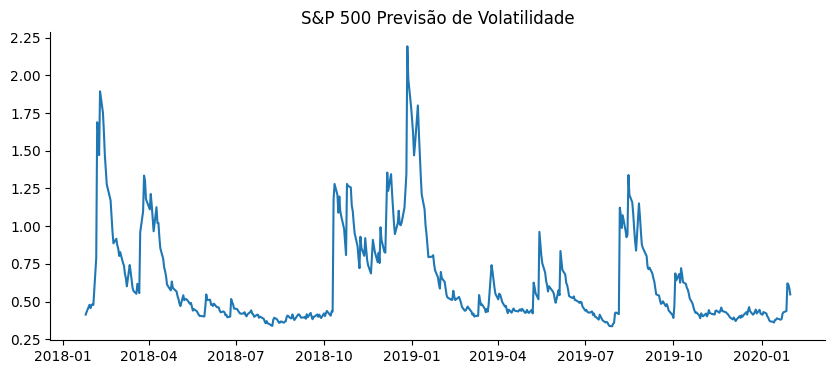

In [12]:
fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_preds)
plt.title('S&P 500 Previsão de Volatilidade')

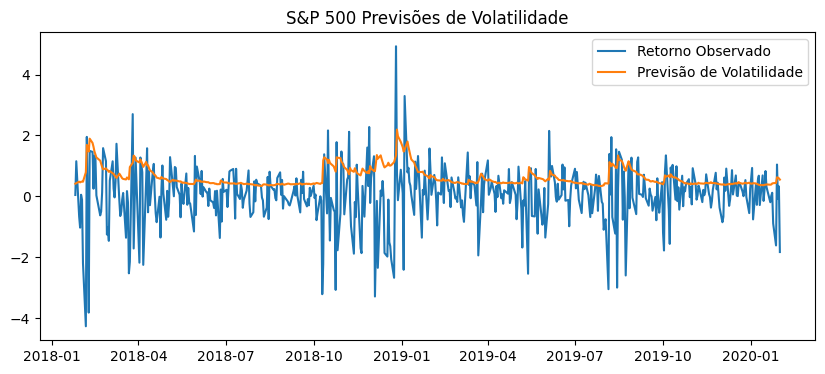

In [13]:
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(df['Retorno'][-y_test.shape[0]:])
ax.plot(y_test.index,rolling_preds)
ax.set_title("S&P 500 Previsões de Volatilidade")
ax.legend(['Retorno Observado', 'Previsão de Volatilidade'])
plt.show()

Avaliação do modelo

In [14]:
from scipy.stats import jarque_bera

def teste_ajuste_jarque_bera(model, cutoff=0.01):
  # Calcula os resíduos obtidos a partir dos dados de teste
  std_resid = model.resid / model.conditional_volatility

  # Aplica o teste de Jarque-Bera
  jb_test = jarque_bera(std_resid)

  test_statistic = jb_test[0]
  p_value = jb_test[1]

  if p_value < cutoff:
    print("Resíduos não estão normalmente distribuídos. Portanto, o modelo pode necessitar de mais ajustes.", )
  else:
    print("Resíduos estão normalmente distribuídos. Portanto, o modelo parece estar bem ajustado.", )

  return test_statistic, p_value

In [15]:
teste_ajuste_jarque_bera(res_garch)

Resíduos não estão normalmente distribuídos. Portanto, o modelo pode necessitar de mais ajustes.


(1950.8814906860541, 0.0)

Como avaliado anteriormente, o teste inidica a necessidade de ajustes adicionais, sobretudo nos hiperparâmetros escolhidos. Encontrar uma nova configuração do modelo GARCH(p,q) que seja melhor ajustada, de acordo com o teste de Jarque-bera.

### Exercício 3
Aplique o modelo de Redes Neurais às mesmas bases de dados usadas na atividade anterior (Lista de Exercícios 3), realizando os mesmo experimentos citados nessa atividade. Em seguida, compare os resultados com o melhor modelo observado no experimento anterior. Discuta se houve um ganho na aplicação de um modelo de Aprendizado de Máquina ao problam de previsão de séries temporais. Avalie também se foram observadas dificuldades em alguns casos.

In [103]:
from math import sqrt

from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

from numpy import array

import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 15, 6

def split_sequence(sequence, n_lags):
 X, y = list(), list()
 for i in range(len(sequence)):

  end_ix = i + n_lags
  # Testa se a sequência chegou ao fim
  if end_ix > len(sequence)-1:
    break
  # cria os trechos x e y de cada amostra
  seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
  X.append(seq_x)
  y.append(seq_y)
 return array(X), array(y)

#### Base 1

Preparando os dados

In [90]:
# número de lags
n_lags = 3

X, y = split_sequence(elec_prod, n_lags)

for i in range(len(X)):
	print(X[i], y[i])

[72.5052 70.672  62.4502] 57.4714
[70.672  62.4502 57.4714] 55.3151
[62.4502 57.4714 55.3151] 58.0904
[57.4714 55.3151 58.0904] 62.6202
[55.3151 58.0904 62.6202] 63.2485
[58.0904 62.6202 63.2485] 60.5846
[62.6202 63.2485 60.5846] 56.3154
[63.2485 60.5846 56.3154] 58.0005
[60.5846 56.3154 58.0005] 68.7145
[56.3154 58.0005 68.7145] 73.3057
[58.0005 68.7145 73.3057] 67.9869
[68.7145 73.3057 67.9869] 62.2221
[73.3057 67.9869 62.2221] 57.0329
[67.9869 62.2221 57.0329] 55.8137
[62.2221 57.0329 55.8137] 59.9005
[57.0329 55.8137 59.9005] 65.7655
[55.8137 59.9005 65.7655] 64.4816
[59.9005 65.7655 64.4816] 61.0005
[65.7655 64.4816 61.0005] 57.5322
[64.4816 61.0005 57.5322] 59.3417
[61.0005 57.5322 59.3417] 68.1354
[57.5322 59.3417 68.1354] 73.8152
[59.3417 68.1354 73.8152] 70.062
[68.1354 73.8152 70.062 ] 65.61
[73.8152 70.062  65.61  ] 60.1586
[70.062  65.61   60.1586] 58.8734
[65.61   60.1586 58.8734] 63.8918
[60.1586 58.8734 63.8918] 68.8694
[58.8734 63.8918 68.8694] 70.0669
[63.8918 68.8694 

Definindo a arquitetura MLP

In [91]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_lags))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Treinando o modelo

In [78]:
model.fit(X, y, epochs=2000, verbose=0)

Realizando a previsão

In [88]:
x_input = array([93.6137, 97.3359, 114.7212])
print(f'{x_input}')
x_input = x_input.reshape((1, n_lags))
print(f'{x_input}')
yhat = model.predict(x_input, verbose=0)
print(yhat)

[ 93.6137  97.3359 114.7212]
[[ 93.6137  97.3359 114.7212]]
[[120.818245]]


In [100]:
# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

# X = electric_production.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

history = [np.double(x) for x in train]
predictions = []

# 3. Aplicando a previsão aos dados, usando validação cruzada.

for t in range(len(test)):
	model.fit(X, y, epochs=2000, verbose=0)
	x_input = test[t]
	x_input = x_input.reshape((1, n_lags))
	yhat = model.predict(x_input, verbose=0)
	predictions.append(yhat[0])
	obs = y[t+size]
	history.append(obs)
	print(f'teste={test[t]}, previsão={yhat[0]}, osbervado={obs}')

teste=[ 89.3583  90.0698 102.8204], previsão=[113.49495], osbervado=114.7068
teste=[ 90.0698 102.8204 114.7068], previsão=[108.692795], osbervado=113.5958
teste=[102.8204 114.7068 113.5958], previsão=[101.83158], osbervado=99.4712
teste=[114.7068 113.5958  99.4712], previsão=[93.78892], osbervado=90.3566
teste=[113.5958  99.4712  90.3566], previsão=[93.74815], osbervado=93.8095
teste=[99.4712 90.3566 93.8095], previsão=[106.99632], osbervado=107.3312
teste=[ 90.3566  93.8095 107.3312], previsão=[116.67693], osbervado=111.9646
teste=[ 93.8095 107.3312 111.9646], previsão=[105.24821], osbervado=103.3679
teste=[107.3312 111.9646 103.3679], previsão=[94.60183], osbervado=93.5772
teste=[111.9646 103.3679  93.5772], previsão=[90.3427], osbervado=87.5566
teste=[103.3679  93.5772  87.5566], previsão=[89.21108], osbervado=92.7603
teste=[93.5772 87.5566 92.7603], previsão=[104.58825], osbervado=101.14
teste=[ 87.5566  92.7603 101.14  ], previsão=[105.82253], osbervado=113.0357
teste=[ 92.7603 10

In [159]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(history[size:], predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(history[size:], predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(history[size:], predictions)
print('Test MAPE: %.3f' % mape)

Test MAE: 2.995
Test RMSE: 3.889
Test MAPE: 0.029


In [149]:
train_values = []
for i in range(len(train)):
    train_values.append(train[i][0])

In [150]:
test_values = []
for i in range(len(X) - size):
    test_values.append(test[i][0])

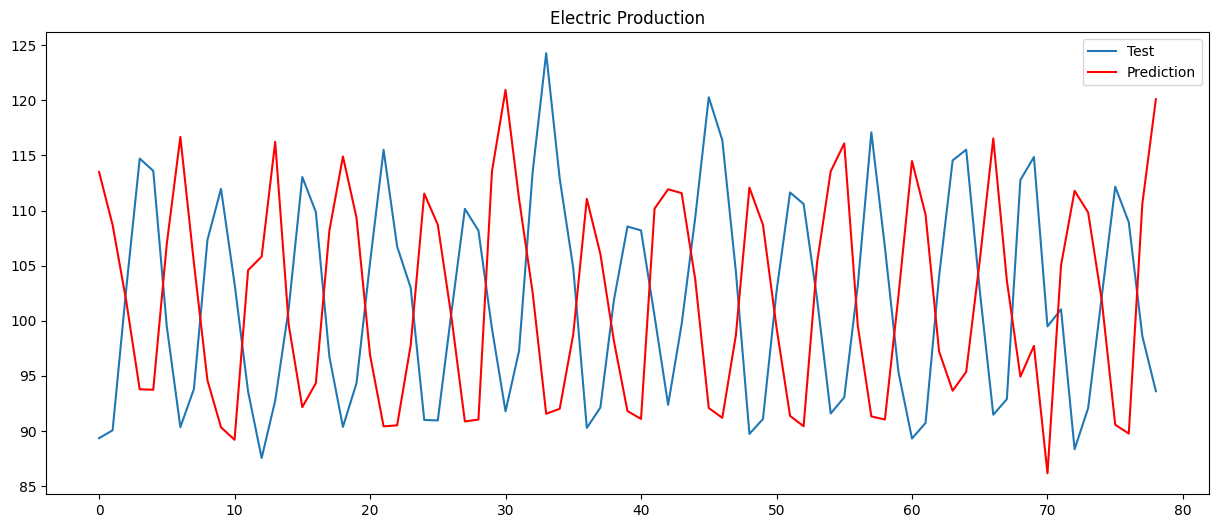

In [152]:
plt.title("Electric Production")
plt.plot(test_values, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

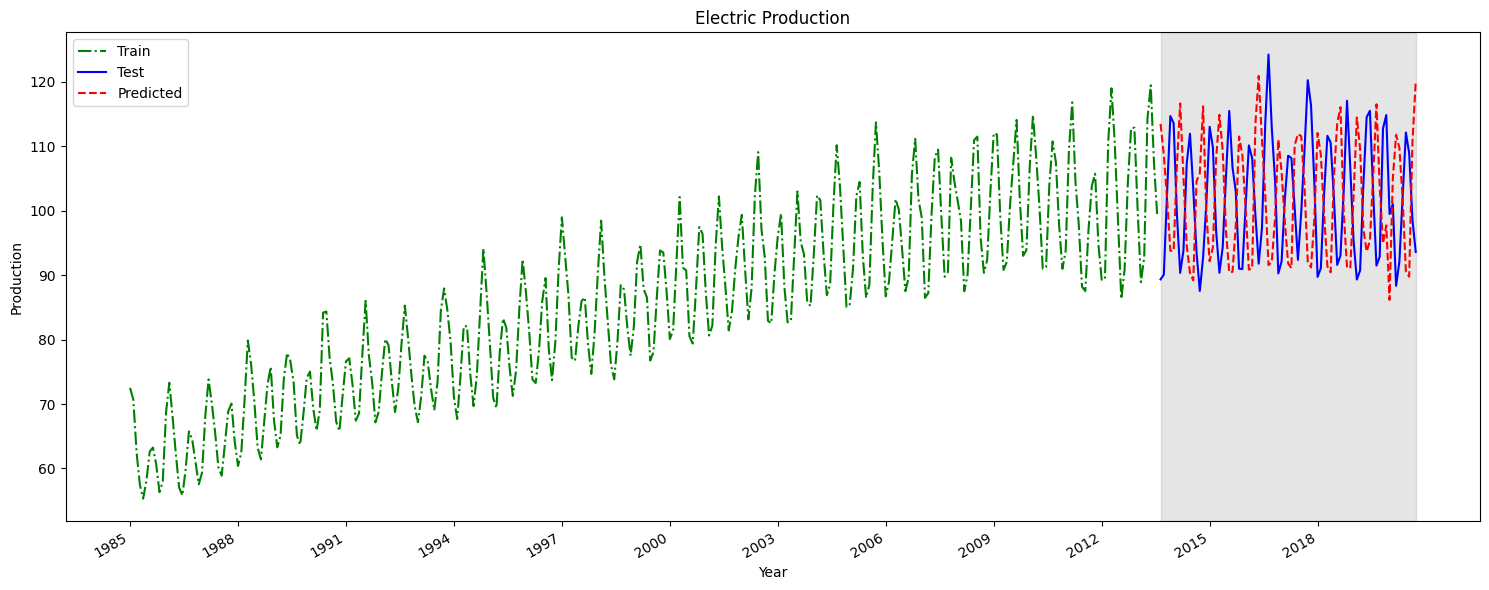

In [157]:
# 5 Ilustrando graficamente o desempenho do modelo simples.

fig, ax = plt.subplots()

ax.plot(electric_production.index[0:size], train_values, 'g-.', label='Train')
ax.plot(electric_production.index[size:len(X)], test_values, 'b-', label='Test')
ax.plot(electric_production.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Production')
ax.axvspan(315, 393, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Electric Production")
plt.xticks(np.arange(0, 396, 33), [1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])

fig.autofmt_xdate()
plt.tight_layout()

#### Base 2

Preparando os dados

In [160]:
# número de lags
n_lags = 3

X, y = split_sequence(shamp_sales, n_lags)

for i in range(len(X)):
	print(X[i], y[i])

[266.  145.9 183.1] 119.3
[145.9 183.1 119.3] 180.3
[183.1 119.3 180.3] 168.5
[119.3 180.3 168.5] 231.8
[180.3 168.5 231.8] 224.5
[168.5 231.8 224.5] 192.8
[231.8 224.5 192.8] 122.9
[224.5 192.8 122.9] 336.5
[192.8 122.9 336.5] 185.9
[122.9 336.5 185.9] 194.3
[336.5 185.9 194.3] 149.5
[185.9 194.3 149.5] 210.1
[194.3 149.5 210.1] 273.3
[149.5 210.1 273.3] 191.4
[210.1 273.3 191.4] 287.0
[273.3 191.4 287. ] 226.0
[191.4 287.  226. ] 303.6
[287.  226.  303.6] 289.9
[226.  303.6 289.9] 421.6
[303.6 289.9 421.6] 264.5
[289.9 421.6 264.5] 342.3
[421.6 264.5 342.3] 339.7
[264.5 342.3 339.7] 440.4
[342.3 339.7 440.4] 315.9
[339.7 440.4 315.9] 439.3
[440.4 315.9 439.3] 401.3
[315.9 439.3 401.3] 437.4
[439.3 401.3 437.4] 575.5
[401.3 437.4 575.5] 407.6
[437.4 575.5 407.6] 682.0
[575.5 407.6 682. ] 475.3
[407.6 682.  475.3] 581.3
[682.  475.3 581.3] 646.9


Definindo a arquitetura MLP

In [62]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_lags))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Treinando o modelo

In [63]:
model.fit(X, y, epochs=2000, verbose=0)

Realizando a previsão

In [64]:
x_input = array([682., 475.3, 581.3])
x_input = x_input.reshape((1, n_lags))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[623.49493]]


Separando a base de dados em treinamento e teste (80/20), para realização da validação cruzada

In [161]:
# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

# X = electric_production.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

history = [np.double(x) for x in train]
predictions = []

# 3. Aplicando a previsão aos dados, usando validação cruzada.

for t in range(len(test)):
	model.fit(X, y, epochs=2000, verbose=0)
	x_input = test[t]
	x_input = x_input.reshape((1, n_lags))
	yhat = model.predict(x_input, verbose=0)
	predictions.append(yhat[0])
	obs = y[t+size]
	history.append(obs)
	print(f'teste={test[t]}, previsão={yhat[0]}, osbervado={obs}')

teste=[315.9 439.3 401.3], previsão=[481.76645], osbervado=437.4
teste=[439.3 401.3 437.4], previsão=[575.14844], osbervado=575.5
teste=[401.3 437.4 575.5], previsão=[371.45154], osbervado=407.6
teste=[437.4 575.5 407.6], previsão=[597.798], osbervado=682.0
teste=[575.5 407.6 682. ], previsão=[500.5462], osbervado=475.3
teste=[407.6 682.  475.3], previsão=[595.4485], osbervado=581.3
teste=[682.  475.3 581.3], previsão=[647.6206], osbervado=646.9


In [162]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(history[size:], predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(history[size:], predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(history[size:], predictions)
print('Test MAPE: %.3f' % mape)

Test MAE: 29.312
Test RMSE: 40.006
Test MAPE: 0.056


In [163]:
train_values = []
for i in range(len(train)):
    train_values.append(train[i][0])

test_values = []
for i in range(len(X) - size):
    test_values.append(test[i][0])

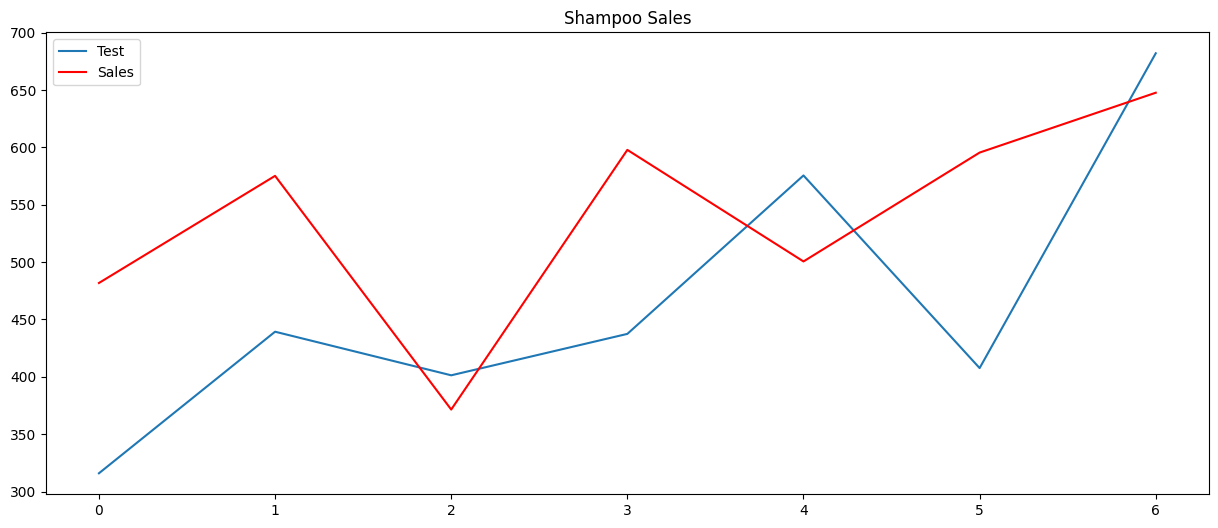

In [164]:
plt.title("Shampoo Sales")
plt.plot(test_values, label='Test')
plt.plot(predictions, color='red', label='Sales')
plt.legend(loc='best')
plt.show()

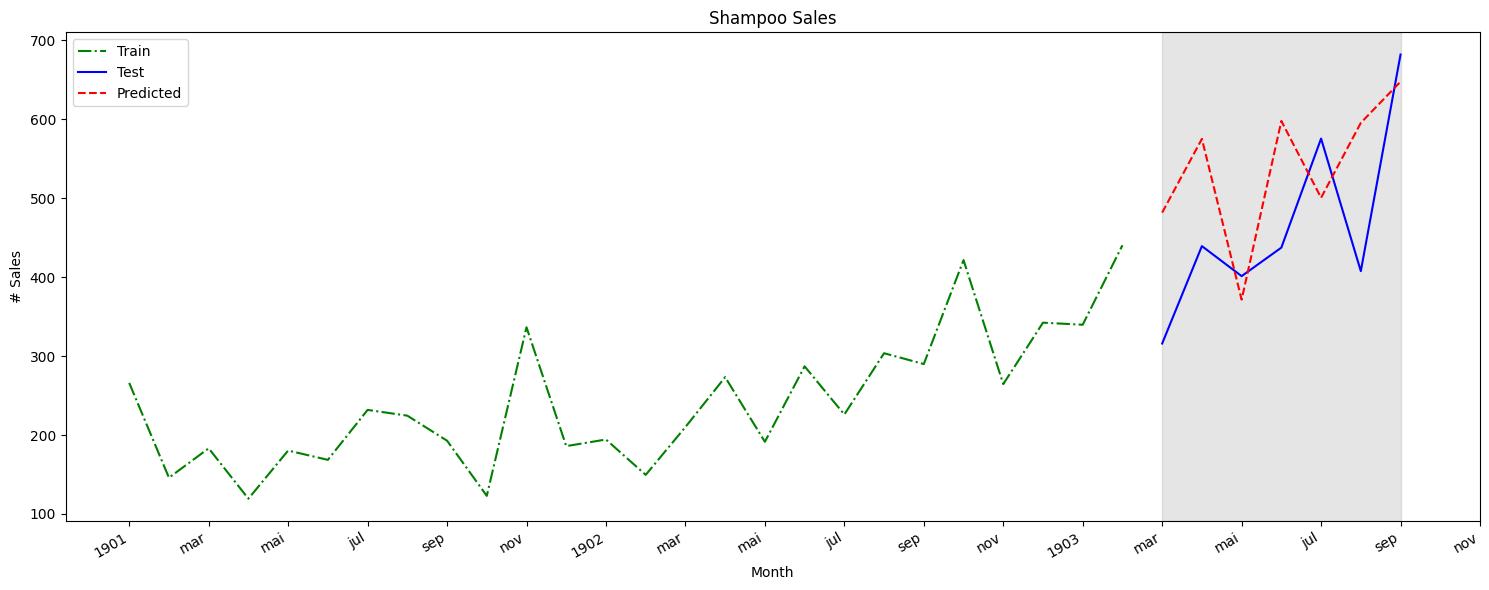

In [169]:
# 5 Ilustrando graficamente o desempenho do modelo simples.

fig, ax = plt.subplots()

ax.plot(shampoo_sales.index[0:size], train_values, 'g-.', label='Train')
ax.plot(shampoo_sales.index[size:len(X)], test_values, 'b-', label='Test')
ax.plot(shampoo_sales.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('# Sales')
ax.axvspan(26, 32, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Shampoo Sales")
plt.xticks(np.arange(0, 36, 2), [1901, 'mar', 'mai', 'jul', 'sep', 'nov', 1902, 'mar', 'mai', 'jul', 'sep', 'nov', 1903, 'mar', 'mai', 'jul', 'sep', 'nov'])

fig.autofmt_xdate()
plt.tight_layout()

#### Base 3

Preparando os dados

In [170]:
# número de lags
n_lags = 3

X, y = split_sequence(air_pass, n_lags)

for i in range(len(X)):
	print(X[i], y[i])

[112 118 132] 129
[118 132 129] 121
[132 129 121] 135
[129 121 135] 148
[121 135 148] 148
[135 148 148] 136
[148 148 136] 119
[148 136 119] 104
[136 119 104] 118
[119 104 118] 115
[104 118 115] 126
[118 115 126] 141
[115 126 141] 135
[126 141 135] 125
[141 135 125] 149
[135 125 149] 170
[125 149 170] 170
[149 170 170] 158
[170 170 158] 133
[170 158 133] 114
[158 133 114] 140
[133 114 140] 145
[114 140 145] 150
[140 145 150] 178
[145 150 178] 163
[150 178 163] 172
[178 163 172] 178
[163 172 178] 199
[172 178 199] 199
[178 199 199] 184
[199 199 184] 162
[199 184 162] 146
[184 162 146] 166
[162 146 166] 171
[146 166 171] 180
[166 171 180] 193
[171 180 193] 181
[180 193 181] 183
[193 181 183] 218
[181 183 218] 230
[183 218 230] 242
[218 230 242] 209
[230 242 209] 191
[242 209 191] 172
[209 191 172] 194
[191 172 194] 196
[172 194 196] 196
[194 196 196] 236
[196 196 236] 235
[196 236 235] 229
[236 235 229] 243
[235 229 243] 264
[229 243 264] 272
[243 264 272] 237
[264 272 237] 211
[272 237 2

Definindo a arquitetura MLP

In [66]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_lags))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Treinando o modelo

In [67]:
model.fit(X, y, epochs=2000, verbose=0)

Realizando a previsão

In [68]:
x_input = array([508, 461, 390])
x_input = x_input.reshape((1, n_lags))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[385.4676]]


Separando a base de dados em treinamento e teste (80/20), para realização da validação cruzada.

In [171]:
# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

# X = electric_production.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

history = [np.double(x) for x in train]
predictions = []

# 3. Aplicando a previsão aos dados, usando validação cruzada.

for t in range(len(test)):
	model.fit(X, y, epochs=2000, verbose=0)
	x_input = test[t]
	x_input = x_input.reshape((1, n_lags))
	yhat = model.predict(x_input, verbose=0)
	predictions.append(yhat[0])
	obs = y[t+size]
	history.append(obs)
	print(f'teste={test[t]}, previsão={yhat[0]}, osbervado={obs}')

teste=[363 435 491], previsão=[466.08658], osbervado=505
teste=[435 491 505], previsão=[468.69254], osbervado=404
teste=[491 505 404], previsão=[379.68777], osbervado=359
teste=[505 404 359], previsão=[305.16183], osbervado=310
teste=[404 359 310], previsão=[318.12018], osbervado=337
teste=[359 310 337], previsão=[369.67703], osbervado=360
teste=[310 337 360], previsão=[366.56857], osbervado=342
teste=[337 360 342], previsão=[356.96957], osbervado=406
teste=[360 342 406], previsão=[394.4823], osbervado=396
teste=[342 406 396], previsão=[402.28867], osbervado=420
teste=[406 396 420], previsão=[474.47427], osbervado=472
teste=[396 420 472], previsão=[510.02832], osbervado=548
teste=[420 472 548], previsão=[568.8541], osbervado=559
teste=[472 548 559], previsão=[484.5956], osbervado=463
teste=[548 559 463], previsão=[393.7173], osbervado=407
teste=[559 463 407], previsão=[376.9294], osbervado=362
teste=[463 407 362], previsão=[344.70346], osbervado=405
teste=[407 362 405], previsão=[415.9

In [172]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(history[size:], predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(history[size:], predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(history[size:], predictions)
print('Test MAPE: %.3f' % mape)

Test MAE: 21.814
Test RMSE: 29.235
Test MAPE: 0.050


In [173]:
train_values = []
for i in range(len(train)):
    train_values.append(train[i][0])

test_values = []
for i in range(len(X) - size):
    test_values.append(test[i][0])

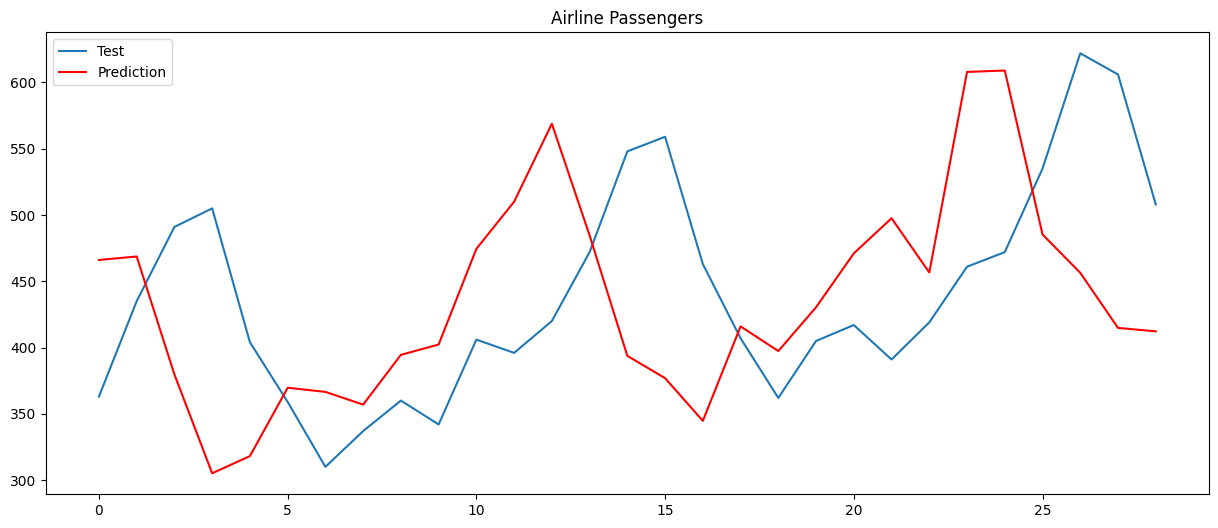

In [174]:
plt.title("Airline Passengers")
plt.plot(test_values, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

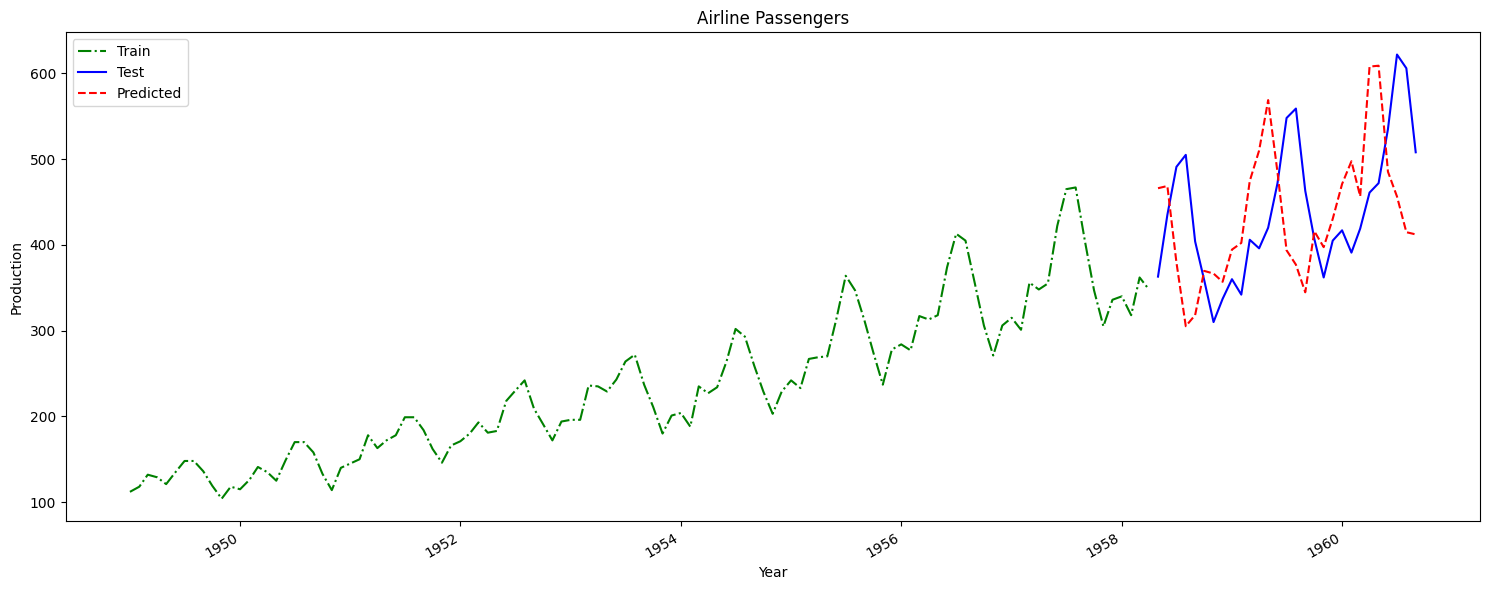

In [175]:
# 5 Ilustrando graficamente o desempenho do modelo simples.

fig, ax = plt.subplots()

ax.plot(airline_passengers.index[0:size], train_values, 'g-.', label='Train')
ax.plot(airline_passengers.index[size:len(X)], test_values, 'b-', label='Test')
ax.plot(airline_passengers.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Production') 
ax.legend(loc='best')
plt.title("Airline Passengers")

fig.autofmt_xdate()
plt.tight_layout()

#### Base 4

Preparando os dados

In [176]:
# número de lags
n_lags = 3

X, y = split_sequence(face_price, n_lags)

for i in range(len(X)):
	print(X[i], y[i])

[38.23     34.029999 31.      ] 32.0
[34.029999 31.       32.      ] 33.029999
[31.       32.       33.029999] 31.91
[32.       33.029999 31.91    ] 28.84
[33.029999 31.91     28.84    ] 28.190001
[31.91     28.84     28.190001] 29.6
[28.84     28.190001 29.6     ] 27.719999
[28.190001 29.6      27.719999] 26.9
[29.6      27.719999 26.9     ] 25.870001
[27.719999 26.9      25.870001] 26.809999
[26.9      25.870001 26.809999] 26.309999
[25.870001 26.809999 26.309999] 27.1
[26.809999 26.309999 27.1     ] 27.01
[26.309999 27.1      27.01    ] 27.4
[27.1  27.01 27.4 ] 27.27
[27.01 27.4  27.27] 28.290001
[27.4      27.27     28.290001] 30.01
[27.27     28.290001 30.01    ] 31.41
[28.290001 30.01     31.41    ] 31.91
[30.01 31.41 31.91] 31.6
[31.41 31.91 31.6 ] 31.84
[31.91 31.6  31.84] 33.049999
[31.6      31.84     33.049999] 32.060001
[31.84     33.049999 32.060001] 33.099998
[33.049999 32.060001 33.099998] 32.23
[32.060001 33.099998 32.23    ] 31.360001
[33.099998 32.23     31.360001] 31

Definindo a arquitetura MLP

In [70]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_lags))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Treinando o modelo

In [71]:
model.fit(X, y, epochs=2000, verbose=0)

Realizando a previsão

In [72]:
x_input = array([268.73999, 267.570007, 256.839996])
x_input = x_input.reshape((1, n_lags))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[258.8504]]


In [177]:
# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

# X = electric_production.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

history = [np.double(x) for x in train]
predictions = []

# 3. Aplicando a previsão aos dados, usando validação cruzada.

for t in range(len(test)):
	model.fit(X, y, epochs=2000, verbose=0)
	x_input = test[t]
	x_input = x_input.reshape((1, n_lags))
	yhat = model.predict(x_input, verbose=0)
	predictions.append(yhat[0])
	obs = y[t+size]
	history.append(obs)
	print(f'teste={test[t]}, previsão={yhat[0]}, osbervado={obs}')

teste=[178.279999 181.440002 183.779999], previsão=[183.54373], osbervado=182.580002
teste=[181.440002 183.779999 182.580002], previsão=[181.11218], osbervado=193.259995
teste=[183.779999 182.580002 193.259995], previsão=[192.54938], osbervado=191.490005
teste=[182.580002 193.259995 191.490005], previsão=[190.53824], osbervado=194.779999
teste=[193.259995 191.490005 194.779999], previsão=[193.87604], osbervado=193.399994
teste=[191.490005 194.779999 193.399994], previsão=[193.7787], osbervado=193.029999
teste=[194.779999 193.399994 193.029999], previsão=[193.07748], osbervado=192.529999
teste=[193.399994 193.029999 192.529999], previsão=[192.66682], osbervado=195.470001
teste=[193.029999 192.529999 195.470001], previsão=[195.01143], osbervado=193.880005
teste=[192.529999 195.470001 193.880005], previsão=[193.99295], osbervado=189.770004
teste=[195.470001 193.880005 189.770004], previsão=[191.19284], osbervado=189.539993
teste=[193.880005 189.770004 189.539993], previsão=[190.20937], os

In [178]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(history[size:], predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(history[size:], predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(history[size:], predictions)
print('Test MAPE: %.3f' % mape)

Test MAE: 3.456
Test RMSE: 4.870
Test MAPE: 0.016


In [179]:
train_values = []
for i in range(len(train)):
    train_values.append(train[i][0])

test_values = []
for i in range(len(X) - size):
    test_values.append(test[i][0])

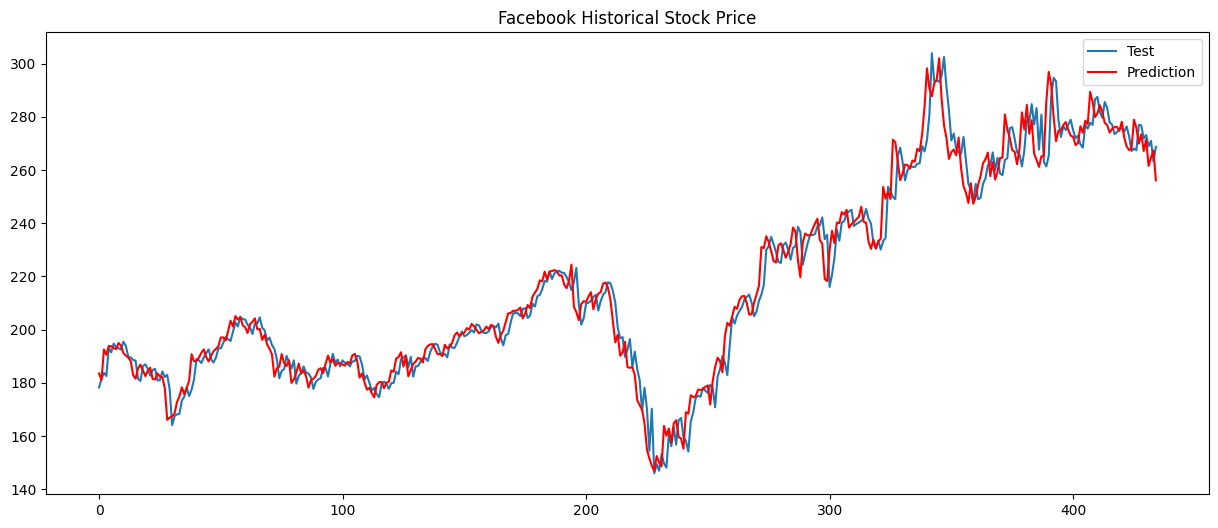

In [180]:
plt.title("Facebook Historical Stock Price")
plt.plot(test_values, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

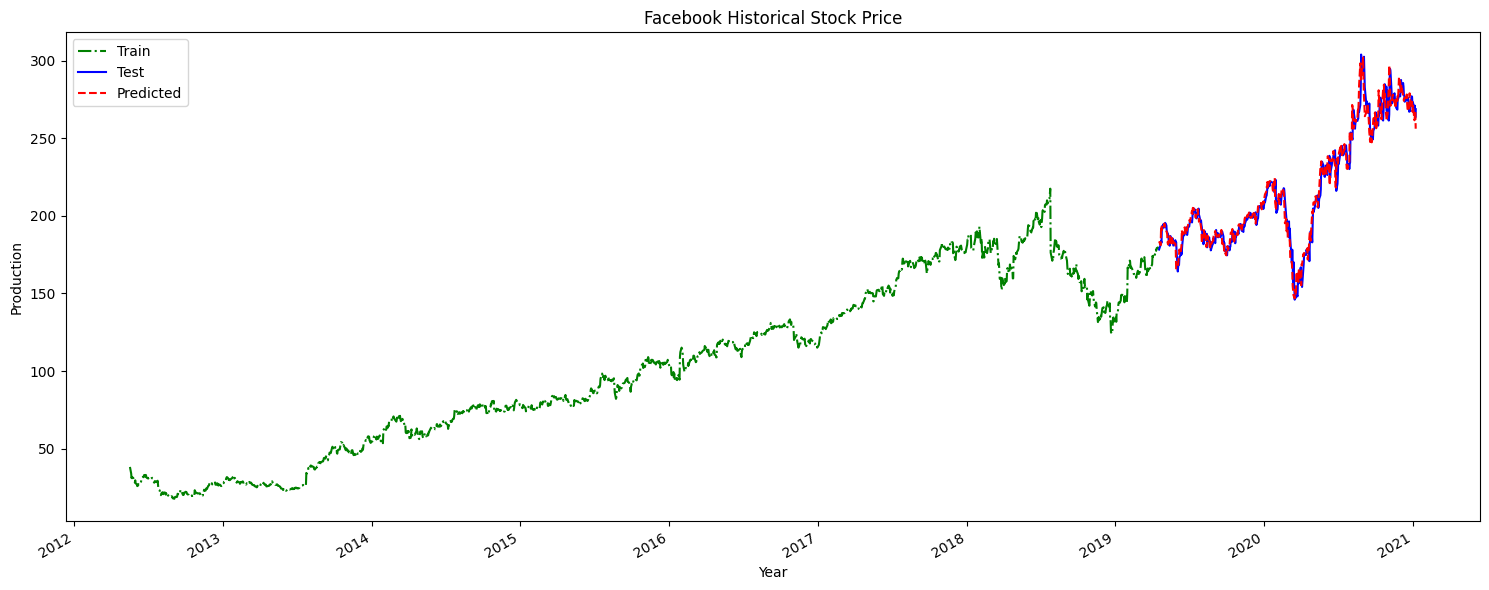

In [181]:
# 5 Ilustrando graficamente o desempenho do modelo simples.

fig, ax = plt.subplots()

ax.plot(facebook_price['Close'].index[0:size], train_values, 'g-.', label='Train')
ax.plot(facebook_price['Close'].index[size:len(X)], test_values, 'b-', label='Test')
ax.plot(facebook_price['Close'].index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Production')
#ax.axvspan(317, 396, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Facebook Historical Stock Price")
# 1985 a 2018
#plt.xticks(np.arange(0, 396, 33), [1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])
# plt.xticks(np.arange(0, 36, 2), [1901, 'mar', 'mai', 'jul', 'sep', 'nov', 1902, 'mar', 'mai', 'jul', 'sep', 'nov', 1903, 'mar', 'mai', 'jul', 'sep', 'nov'])

fig.autofmt_xdate()
plt.tight_layout()